In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyDFN3D as dfnpy

work_dir=%pwd
print('Current Workdir=',work_dir)

Current Workdir= e:\Code_Repos\PyDFN3D\Examples


In [2]:
Case1=dfnpy.DFN_Model()
#Case1.loadDFN('..\Datas\DFN_2fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs_Well.dat')
Case1.loadDFN('..\Datas\dfnworks_4rects_Well.dat')

[Input] Reading "..\Datas\dfnworks_4rects_Well.dat" DFN file....
Dimension= 3
Number of Points= 25
Number of Fractures= 4
Number of Intersections= 3
Number of Wells= 2
Fracture 0 has Intersections of  [0, 1, 2]
Fracture 1 has Intersections of  [0]
Fracture 2 has Intersections of  [1]
Fracture 3 has Intersections of  [2]


------------Setting up Fracture 1------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:60(Total) 36(Edge) 24(Trace)
[Mesh] Number of Nodes:180(Total) 108(Edge) 72(Trace) 0(Source)
------------Setting up Fracture 2------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:37(Total) 28(Edge) 8(Trace)
[Mesh] Number of Nodes:109(Total) 84(Edge) 24(Trace) 1(Source)
------------Setting up Fracture 3------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:37(Total) 28(Edge) 8(Trace)
[Mesh] Number of Nodes:109(Total) 84(Edge) 24(Trace) 1(Source)
------------Setting up Fracture 4------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:37(Total) 28(Edge) 8(Trace)
[Mesh] Number of Nodes:109(Total) 84(Edge) 24(Trace) 1(Source)
Total DOF= 507

------------ Fracture 0------------


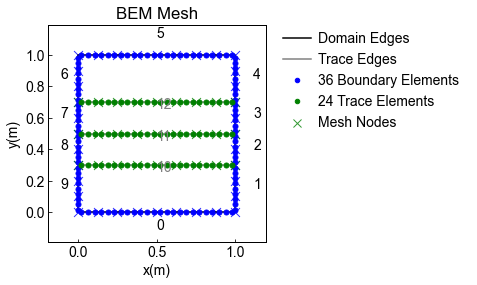


------------ Fracture 1------------


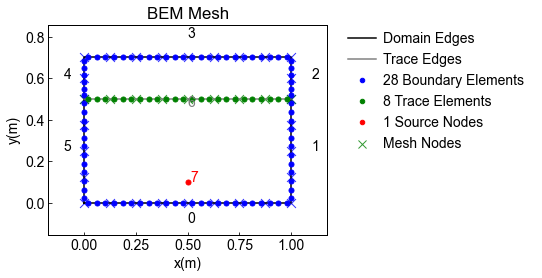


------------ Fracture 2------------


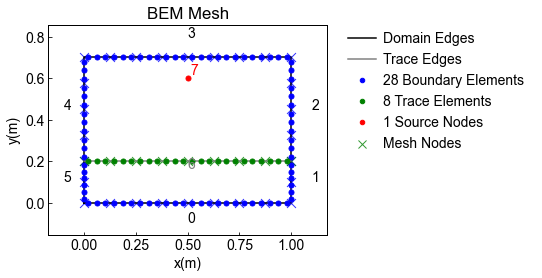


------------ Fracture 3------------


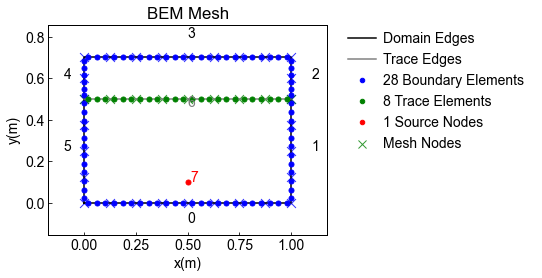

In [3]:
h_mesh_frac=1/8
Case1.setFlowSolver(solver='BEM',h_frac=h_mesh_frac,h_trace=h_mesh_frac)

for i in range(Case1.FracNets.NumFracs):
    print('\n------------ Fracture %d------------'%(i))
    Case1.FlowSolver.showMesh(i)

## Set up boundary conditions

In [4]:
#2. Set up boundary condition automatically
Inlets=[(2,7,'Dirichlet',2e6)] #Inlets (fracID,BdID,BCtype,BCvalue)
#Inlets=[(2,3,'Dirichlet',2e6)] #Inlets (fracID,BdID,BCtype,BCvalue)
Outlets=[(1,7,'Dirichlet',1e6),(3,7,'Dirichlet',1e6)] #Outlets (fracID,BdID)

for BC in Inlets+Outlets:
    fracID,BDID,BC_type,BC_val=BC
    if(BC_type=='Dirichlet'):
        Case1.setBoundaryConditions(fracID=fracID,DirichletBC=[(BDID,BC_val)])
    if(BC_type=='Neumann'):
        Case1.setBoundaryConditions(fracID=fracID,NeumannBC=[(BDID,BC_val)])

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(7, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(7, 1000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(7, 1000000.0)]


## Set up frac props and solve

[Solution] #DOFs= 180
[Solution] #DOFs= 109
[Solution] #DOFs= 109
[Solution] #DOFs= 109
10	0.027112898705204242		alpha:	178580744.21760786
20	0.1358043263385408		alpha:	275265767.80084085
30	0.005242222660564964		alpha:	141456445.48624673
40	0.002155494535179633		alpha:	284256732.64826375
50	0.001709508944837536		alpha:	788376423.286237
60	0.00034320786775179457		alpha:	119359453.07848969
70	0.00010322446567165738		alpha:	386904028.0076541
80	5.806880101077685e-05		alpha:	570043891.6273935
90	0.00011339463145430506		alpha:	848140758.5662358
100	5.1371692966294656e-08		alpha:	112154190.11189649
110	9.082353355646169e-07		alpha:	2399838817.7119026
120	3.1230234574223736e-08		alpha:	136272113.8823911
130	7.261966507420432e-08		alpha:	455457419.71219033
140	5.9543410085835674e-09		alpha:	364260982.7744376
150	4.320433429379127e-08		alpha:	144708069.642297
160	1.154166661357026e-10		alpha:	122087454.86137879
Converged at 161 Steps! TOL= 1e-10
Dirichelt [1318030.76568946 1317941.24288604 131

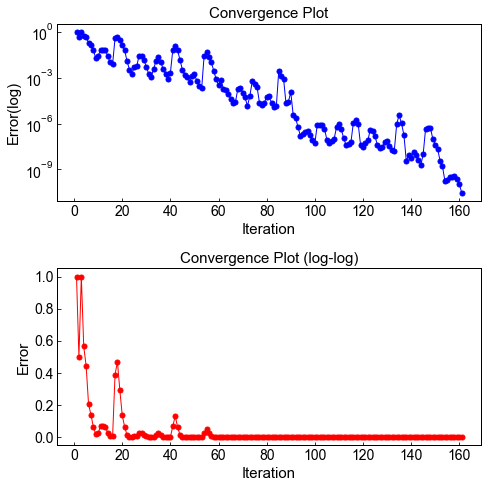

In [5]:
Case1.setFracProperties(perm=3e-10,aperature=0.001)
Case1.solveFlow(max_iters=500,tolerance=1e-10)

### Check mass balance error and write Paraview file

In [6]:
Q_in=0.0
Q_out=0.0
for BC in Inlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_in+=Flux
    print('[Inlet Flux] Frac %d Boundary ID %d Flux=%s [m^3/s]'%(fracID,BDID,Flux))
for BC in Outlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_out+=Flux
    print('[Outlet Flux] Frac %d Boundary ID %d Flux=%s [m^3/s]'%(fracID,BDID,Flux))

print('[Mass Balance]',abs(Q_in+Q_out))

[Inlet Flux] Frac 2 Boundary ID 7 Flux=0.0001508352028699141 [m^3/s]
[Outlet Flux] Frac 1 Boundary ID 7 Flux=-7.541759825412664e-05 [m^3/s]
[Outlet Flux] Frac 3 Boundary ID 7 Flux=-7.541759825412701e-05 [m^3/s]
[Mass Balance] 6.361660438887473e-12


In [7]:
#FEM-BEM Error
(0.00015083809638013001+-1.5113749028417117E-4)/1.5113749028417117E-4*100

-0.19809373801181482

In [8]:
86400*0.00015083809638013001

13.032411527243234

In [9]:
86400*1.5113749028417117E-4

13.05827916055239

In [11]:
#Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_4fracs_Well.msh',fname='DFN_4fracs_Well.vtp')
Mesh=Case1.writeSolution(mesh_input='..\Datas\dfnworks_4rects_gmsh.msh',fname='dfnworks_4rects.vtp')

Pressure Range= 1000000.0 2000000.0
[Output] Saved VTK mesh and solution file Results\dfnworks_4rects_solution.vtu) !


### Verification against FEM

In [12]:
import numpy as np
from utils import *
tol=1e-3
Pts1,Pts2=(0.0+tol,0.55),(1.0-tol,0.55)

#BEM Solution
PUV=Case1.FlowSolver.SubProblems[2].PostProcess.plot_Solution_overline(Pts1,Pts2,NumSamples=40,plot=False)

#Get Comsol Data
P_ref = np.genfromtxt('.\\Verification\\dfnworks_4recs_p.csv', comments='%',delimiter=',')
u_ref = np.genfromtxt('.\\Verification\\dfnworks_4recs_u.csv', comments='%',delimiter=',')
v_ref = np.genfromtxt('.\\Verification\\dfnworks_4recs_v.csv', comments='%',delimiter=',')

-----------------Pressure over line-----------------
e:\Code_Repos\PyDFN3D\Examples\utils.py:151: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, color=Colors[i],linestyle=linestyles[i],marker=markers[i],alpha=Alpha[i],mfc='none',
e:\Code_Repos\PyDFN3D\Examples\utils.py:151: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, color=Colors[i],linestyle=linestyles[i],marker=markers[i],alpha=Alpha[i],mfc='none',


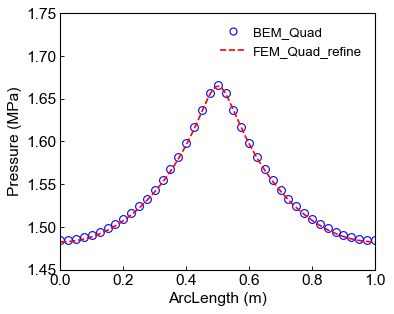

-----------------Velocity U over line-----------------
e:\Code_Repos\PyDFN3D\Examples\utils.py:151: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, color=Colors[i],linestyle=linestyles[i],marker=markers[i],alpha=Alpha[i],mfc='none',
e:\Code_Repos\PyDFN3D\Examples\utils.py:151: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, color=Colors[i],linestyle=linestyles[i],marker=markers[i],alpha=Alpha[i],mfc='none',


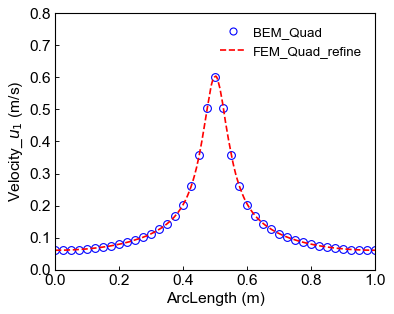

-----------------Velocity V over line-----------------
e:\Code_Repos\PyDFN3D\Examples\utils.py:151: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, color=Colors[i],linestyle=linestyles[i],marker=markers[i],alpha=Alpha[i],mfc='none',
e:\Code_Repos\PyDFN3D\Examples\utils.py:151: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, color=Colors[i],linestyle=linestyles[i],marker=markers[i],alpha=Alpha[i],mfc='none',


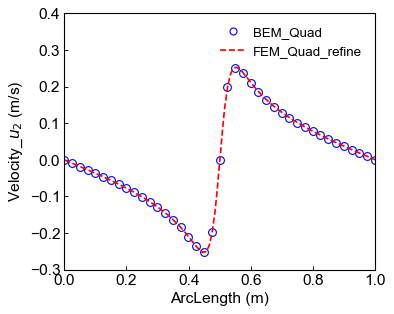

-----------------Velocity Magn over line-----------------
e:\Code_Repos\PyDFN3D\Examples\utils.py:151: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, color=Colors[i],linestyle=linestyles[i],marker=markers[i],alpha=Alpha[i],mfc='none',
e:\Code_Repos\PyDFN3D\Examples\utils.py:151: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, color=Colors[i],linestyle=linestyles[i],marker=markers[i],alpha=Alpha[i],mfc='none',


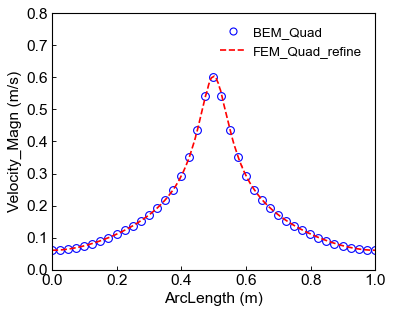

In [13]:
DataSetName=['BEM_Quad','FEM_Quad_refine']
space=1
MPa=1e6
ArcLength=[PUV[::space,0],P_ref[::space,0]]
Pressure=[PUV[::space,1]/MPa,P_ref[::space,1]/MPa]

print("-----------------Pressure over line-----------------")
plotTables(X=ArcLength,Y=Pressure, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Pressure (MPa)',Xlim=[0,1],Ylim=[1.45,1.75],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_PressureOverLine.png')


Velocity=[-PUV[::space,3],u_ref[::space,1]]

print("-----------------Velocity U over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity_$u_1$ (m/s)',Xlim=[0,1],Ylim=[0,0.8],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_VelocityYOverLine_U.png')

Velocity=[PUV[::space,2],v_ref[::space,1]]

print("-----------------Velocity V over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity_$u_2$ (m/s)',Xlim=[0,1],Ylim=[-0.3,0.4],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_VelocityYOverLine_V.png')

UMag_FEM=np.sqrt(u_ref[:,1]*u_ref[:,1]+v_ref[:,1]*v_ref[:,1])
UMag_BEM=np.sqrt(PUV[:,2]*PUV[:,2]+PUV[:,3]*PUV[:,3])
Velocity=[UMag_BEM[::space],UMag_FEM[::space]]


print("-----------------Velocity Magn over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity_Magn (m/s)',Xlim=[0,1],Ylim=[0,0.8],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_VelocityYOverLine.pdf')

In [14]:
Case1.FlowSolver.SubProblems[2].PostProcess.get_BDSolution(7)

(array([2000000.]), array([-0.1508352]), array([-0.]), array([-0.]))

In [15]:
Case1.FlowSolver.SubProblems[3].PostProcess.get_BDFlux(2)

0.0

In [16]:
Case1.FlowSolver.SubProblems[2].get_Solution((0.5,0.5))

(1591086.3596265912, -9.162249625660478e-16, -0.35165450022109584)

In [17]:
Case1.FlowSolver.SubProblems[1].get_Solution((0.5,0.2))

(1204469.3074271393, -1.9675098883453756e-15, -0.1758819918934924)

In [18]:
Case1.FlowSolver.SubProblems[3].get_Solution((0.5,0.2))

(1204469.3074271404, 3.0827777663944288e-15, -0.17588199189349335)

In [19]:
-0.17647058820819403+-0.1764705882081352+0.3529411764944523

7.812306357379839e-11

In [20]:
Case1.FracNets.getFracsIntersectTable()

[[0, 1, 10, 6], [0, 2, 11, 6], [0, 3, 12, 6]]

In [21]:
Case1.FracNets.Get3DFracGeo(0)[1]

[array([ 0. , -0.5,  0.2]),
 array([0. , 0.5, 0.2]),
 array([ 0. , -0.5,  0. ]),
 array([0. , 0.5, 0. ]),
 array([ 0. , -0.5, -0.2]),
 array([ 0. ,  0.5, -0.2])]

In [22]:
Case1.FracNets.Get3DFracGeo(1)[1]

[array([ 0. , -0.5,  0.2]), array([0. , 0.5, 0.2])]